In [1]:
%matplotlib inline
import numpy as np
import skimage.external.tifffile
import os
import matplotlib.pyplot as plt
from PIL import Image

import multiprocessing  
from multiprocessing import Pool

import pylattice as pyl
import pylattice.functions.TiffProcessing as tifproc

import sys
sys.path.append('/Users/johannesschoeneberg/git/JohSchoeneberg/pyLattice/src/python/pylattice/functions')
import ParallelFunctions
from pprint import pprint
import time

In [2]:
truthFile = "/Users/johannesschoeneberg/git/JohSchoeneberg/pyLatticeML/src/evaluationMetrics/_ignored/realData/dmask_01_cropped_96x480x672.tif"
predictionFile = "/Users/johannesschoeneberg/git/JohSchoeneberg/pyLatticeML/src/evaluationMetrics/_ignored/realData/3prediction.tif"


In [3]:
truth = ParallelFunctions.open3dTiff(truthFile)
prediction = ParallelFunctions.open3dTiff(predictionFile)

GroundTruth


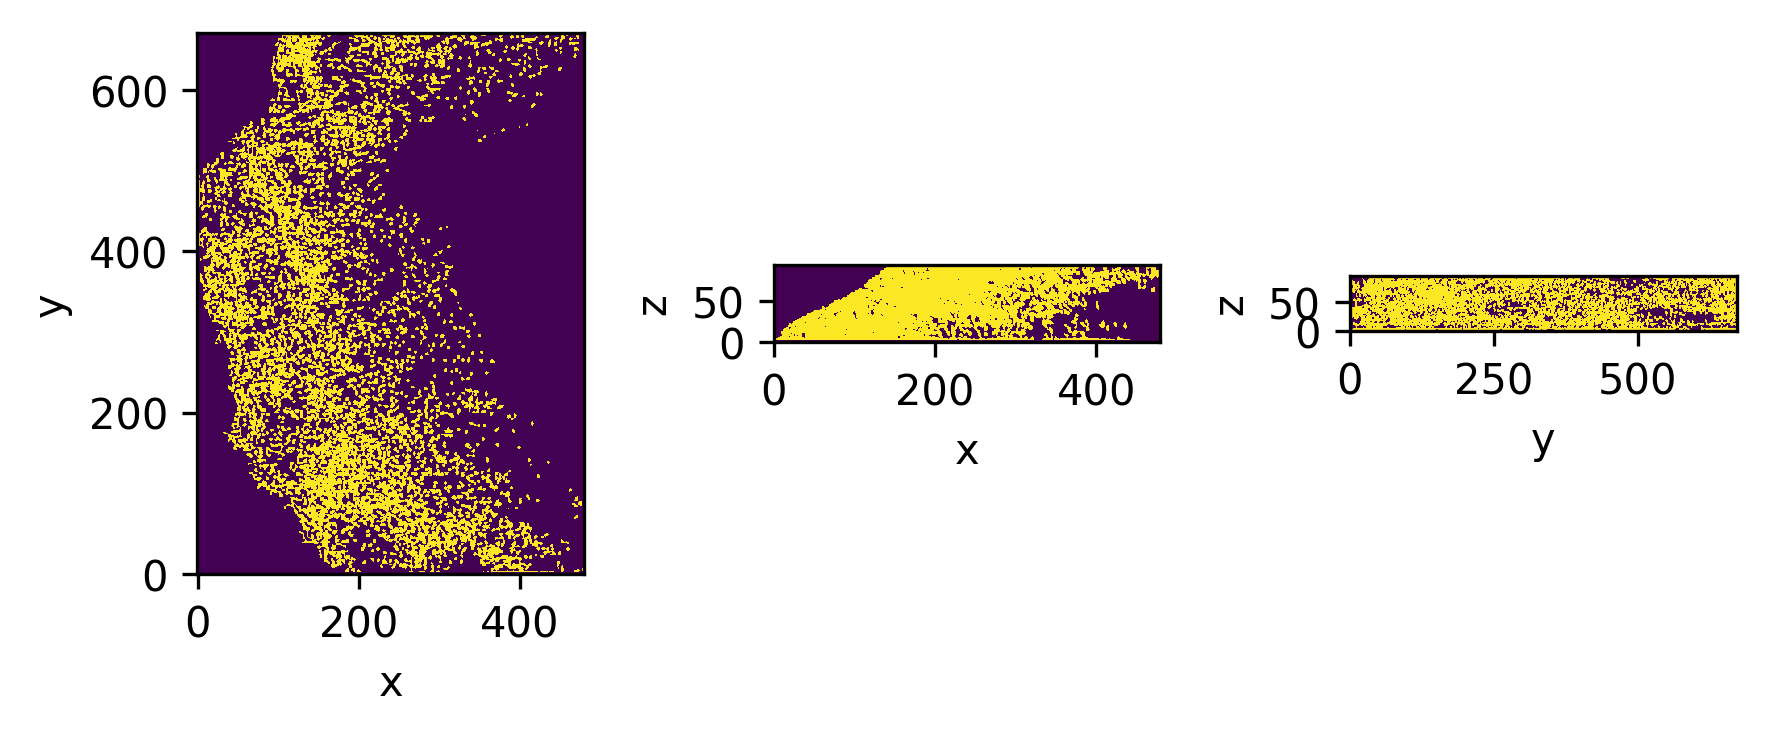

Prediction


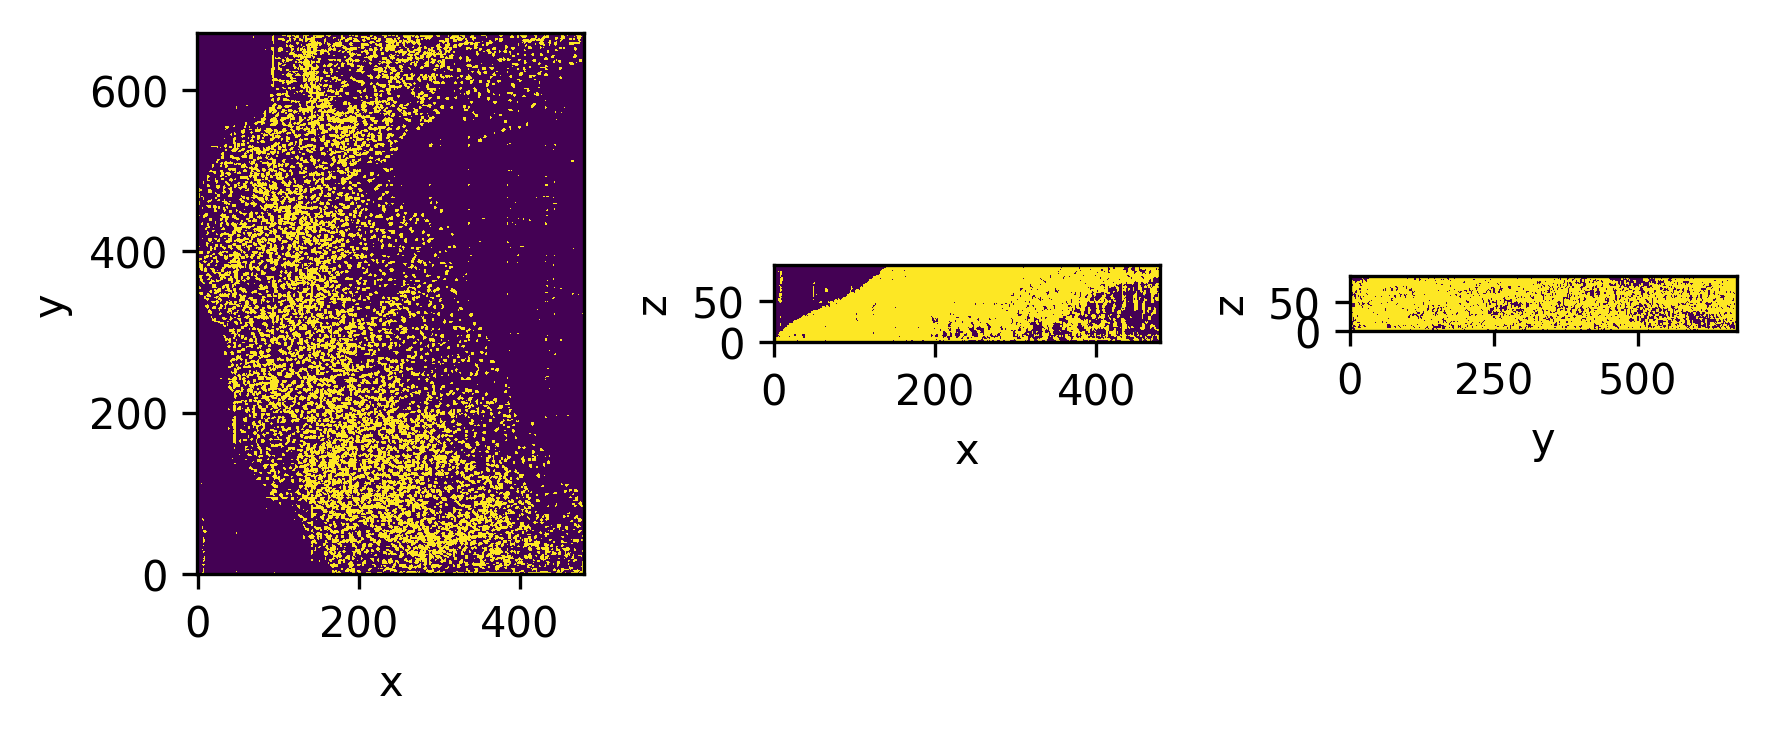

In [4]:
print('GroundTruth')
tifproc.maxIntensityProjection(truth)
print('Prediction')
tifproc.maxIntensityProjection(prediction)

# label all connected components in the mask

In [5]:
from scipy import ndimage
label_im, nb_labels = ndimage.label(truth)
print(nb_labels)

4188


In [6]:
import skimage
import os

multiplierForOutput = 1
outputPath_tiff = "./truth_components_labeled.tiff"
skimage.external.tifffile.imsave(outputPath_tiff, (label_im*multiplierForOutput).astype('uint16'))    
print(os.path.abspath(outputPath_tiff))


/Users/johannesschoeneberg/git/JohSchoeneberg/pyLatticeML/src/evaluationMetrics/truth_components_labeled.tiff


In [7]:
ndimage.find_objects(label_im==4)[0]

(slice(2, 6, None), slice(10, 18, None), slice(280, 285, None))

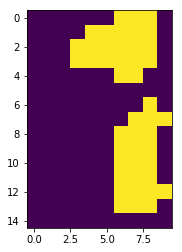

In [8]:
slice_z, slice_x, slice_y  = ndimage.find_objects(label_im==7)[0]
roi = truth[slice_z, slice_x, slice_y]
plt.imshow(roi[0])     

In [9]:
ndimage.measurements.center_of_mass(truth)

(45.38850811261167, 302.83731338500814, 190.10153137339375)

In [10]:
label_im, nb_labels = ndimage.label(truth)
truth_allCentersOfMass = ndimage.measurements.center_of_mass(truth, label_im,range(1,nb_labels+1) )
pprint(truth_allCentersOfMass)

[(3.22007722007722, 8.944658944658945, 390.7683397683398),
 (3.0, 2.506849315068493, 432.24657534246575),
 (3.4742268041237114, 12.175257731958762, 167.98969072164948),
 (3.1774193548387095, 12.32258064516129, 282.2903225806452),
 (3.60625, 21.825, 161.2875),
 (3.3986254295532645, 26.077319587628867, 362.53264604810994),
 (2.9411764705882355, 20.169934640522875, 274.60130718954247),
 (2.6292134831460676, 19.797752808988765, 188.56179775280899),
 (2.823529411764706, 20.0, 379.0980392156863),
 (3.225721784776903, 38.976377952755904, 157.31233595800524),
 (2.8421052631578947, 34.31578947368421, 315.39473684210526),
 (7.874015748031496, 39.54330708661417, 341.40551181102364),
 (3.3333333333333335, 37.03174603174603, 350.3492063492063),
 (3.1226415094339623, 39.028301886792455, 141.87735849056602),
 (3.6808510638297873, 40.1063829787234, 181.95744680851064),
 (2.4390243902439024, 48.34146341463415, 130.7560975609756),
 (2.6666666666666665, 44.0, 140.66666666666666),
 (2.7954545454545454, 45

 (16.176470588235293, 433.6764705882353, 43.705882352941174),
 (16.85185185185185, 443.1666666666667, 66.29629629629629),
 (18.25242718446602, 452.9126213592233, 138.06796116504853),
 (16.6, 459.26666666666665, 69.0),
 (16.96825396825397, 462.3333333333333, 115.74603174603175),
 (16.964285714285715, 466.30357142857144, 142.32142857142858),
 (16.78846153846154, 468.65384615384613, 40.5),
 (18.983606557377048, 479.59016393442624, 46.9344262295082),
 (17.157894736842106, 495.7894736842105, 155.4561403508772),
 (17.4, 514.123076923077, 50.30769230769231),
 (17.275, 520.875, 59.4),
 (16.40909090909091, 558.4318181818181, 80.79545454545455),
 (19.478048780487804, 654.5121951219512, 128.53170731707317),
 (19.19277108433735, 27.313253012048193, 435.2048192771084),
 (23.316384180790962, 34.14124293785311, 373.8135593220339),
 (22.079754601226995, 43.987730061349694, 296.6196319018405),
 (20.27777777777778, 72.30555555555556, 313.1458333333333),
 (17.927272727272726, 90.50909090909092, 277.45454

 (54.254901960784316, 164.66666666666666, 252.58823529411765),
 (52.924528301886795, 165.32075471698113, 258.1132075471698),
 (54.78832116788321, 185.52554744525548, 270.11678832116786),
 (53.472727272727276, 186.6909090909091, 282.41818181818184),
 (52.90625, 190.09375, 140.84375),
 (52.714285714285715, 197.67857142857142, 157.76785714285714),
 (53.526315789473685, 211.96491228070175, 161.89473684210526),
 (53.482142857142854, 213.83928571428572, 246.83928571428572),
 (53.888888888888886, 217.63247863247864, 205.23931623931625),
 (53.46511627906977, 217.3953488372093, 138.09302325581396),
 (52.608695652173914, 223.43478260869566, 144.7608695652174),
 (52.57692307692308, 227.51923076923077, 225.01923076923077),
 (53.319148936170215, 247.3404255319149, 182.04255319148936),
 (55.12643678160919, 252.2528735632184, 176.16091954022988),
 (53.26470588235294, 258.88235294117646, 107.58823529411765),
 (52.285714285714285, 287.2142857142857, 99.38095238095238),
 (53.035714285714285, 328.9821428

 (85.31818181818181, 30.545454545454547, 434.6363636363636),
 (86.23287671232876, 38.986301369863014, 306.45205479452056),
 (87.11578947368422, 46.252631578947366, 411.2736842105263),
 (85.0, 48.78947368421053, 376.70175438596493),
 (84.57446808510639, 82.65957446808511, 301.6595744680851),
 (84.80434782608695, 88.26086956521739, 322.7173913043478),
 (85.36781609195403, 91.0919540229885, 305.8965517241379),
 (87.67567567567568, 110.5945945945946, 219.05405405405406),
 (84.85714285714286, 113.02380952380952, 244.3095238095238),
 (86.140625, 110.296875, 227.515625),
 (85.20754716981132, 114.60377358490567, 384.9622641509434),
 (84.84482758620689, 124.41379310344827, 267.62068965517244),
 (84.5223880597015, 135.07462686567163, 219.70149253731344),
 (86.10975609756098, 143.3658536585366, 222.03658536585365),
 (84.71739130434783, 151.2826086956522, 238.6086956521739),
 (84.70270270270271, 152.40540540540542, 295.5405405405405),
 (85.31372549019608, 162.68627450980392, 223.7843137254902),
 (

In [11]:
label_im, nb_labels = ndimage.label(prediction)
prediction_allCentersOfMass = ndimage.measurements.center_of_mass(prediction, label_im,range(1,nb_labels+1) )
pprint(prediction_allCentersOfMass)

[(3.051948051948052, 1.12987012987013, 175.11688311688312),
 (0.7894736842105263, 2.4473684210526314, 193.31578947368422),
 (1.5416666666666667, 1.7083333333333333, 420.7083333333333),
 (4.345029239766082, 1.8245614035087718, 431.87719298245617),
 (2.3, 1.5714285714285714, 448.6714285714286),
 (1.2285714285714286, 10.542857142857143, 192.8),
 (2.526848409748038, 11.789136720363485, 6.947542337876911),
 (0.8235294117647058, 16.323529411764707, 303.44117647058823),
 (2.107142857142857, 13.964285714285714, 448.10714285714283),
 (0.5, 15.5, 151.0),
 (1.2590799031476998, 16.493946731234868, 142.61743341404357),
 (2.2888888888888888, 18.266666666666666, 193.13333333333333),
 (2.169230769230769, 20.153846153846153, 379.4923076923077),
 (1.9166666666666667, 21.354166666666668, 187.39583333333334),
 (1.5151515151515151, 22.78787878787879, 282.030303030303),
 (1.1414617106335632, 36.94524730570686, 194.04296637470404),
 (1.6585365853658536, 26.634146341463413, 142.14634146341464),
 (0.6666666666

 (5.357142857142857, 338.7857142857143, 28.785714285714285),
 (11.560975609756097, 342.3414634146341, 55.82439024390244),
 (4.5, 343.0, 60.5),
 (11.146596858638743, 348.80104712041884, 46.41884816753927),
 (6.793103448275862, 351.7241379310345, 55.632183908045974),
 (8.0, 359.68932038834953, 116.55339805825243),
 (6.162162162162162, 365.86486486486484, 108.67567567567568),
 (7.615384615384615, 394.38461538461536, 61.11538461538461),
 (6.980392156862745, 409.03921568627453, 77.68627450980392),
 (5.458333333333333, 412.5833333333333, 26.25),
 (5.694444444444445, 413.47222222222223, 84.41666666666667),
 (6.783333333333333, 413.8333333333333, 92.46666666666667),
 (5.907407407407407, 413.3333333333333, 49.31481481481482),
 (4.0, 423.0, 144.0),
 (4.0, 425.0, 144.0),
 (6.590361445783133, 436.3975903614458, 127.91566265060241),
 (6.821428571428571, 439.76785714285717, 112.82142857142857),
 (4.0, 451.0, 134.0),
 (9.557142857142857, 449.84285714285716, 102.37142857142857),
 (4.5, 463.0, 68.0),
 

 (19.93846153846154, 609.0461538461539, 112.63076923076923),
 (21.254434212965823, 644.1717755392126, 118.3799208948767),
 (22.085106382978722, 648.9148936170212, 145.0212765957447),
 (20.414634146341463, 658.439024390244, 260.780487804878),
 (20.707070707070706, 668.5555555555555, 134.11111111111111),
 (19.0, 7.0, 430.0),
 (21.72292907417434, 11.310638873849486, 383.27422847861396),
 (20.789473684210527, 15.578947368421053, 423.0),
 (19.0, 30.0, 430.0),
 (21.28301886792453, 37.45283018867924, 343.50943396226415),
 (19.75, 58.125, 302.0),
 (23.156335384100668, 72.44093975948402, 335.0475455846546),
 (22.2, 78.06, 213.26),
 (22.119402985074625, 83.85074626865672, 253.13432835820896),
 (22.57658239527588, 96.48233068831888, 170.12935966045396),
 (19.5, 97.0, 186.0),
 (21.340425531914892, 98.76595744680851, 199.7872340425532),
 (19.0, 111.0, 221.0),
 (20.363636363636363, 114.0909090909091, 272.5),
 (21.846153846153847, 129.6, 147.69230769230768),
 (20.57894736842105, 131.52631578947367, 2

 (41.54761904761905, 73.35714285714286, 178.47619047619048),
 (45.96796338672769, 70.61922196796338, 434.0732265446224),
 (42.42857142857143, 75.73809523809524, 225.35714285714286),
 (42.175, 83.4, 161.275),
 (41.92857142857143, 84.97619047619048, 267.9761904761905),
 (41.63636363636363, 105.51515151515152, 154.78787878787878),
 (43.93693693693694, 114.85585585585585, 361.5405405405405),
 (43.850746268656714, 114.86567164179104, 338.76119402985074),
 (42.92307692307692, 125.0, 288.4175824175824),
 (44.81188118811881, 140.58415841584159, 134.1881188118812),
 (46.22304248876183, 142.53958282393214, 302.8896778076626),
 (46.68666666666667, 148.45333333333335, 134.95333333333335),
 (40.666666666666664, 159.5, 127.83333333333333),
 (41.5, 164.5, 129.0),
 (44.473684210526315, 172.2736842105263, 174.5157894736842),
 (41.23529411764706, 184.23529411764707, 226.23529411764707),
 (40.5, 193.0, 0.0),
 (44.68518518518518, 193.4537037037037, 135.9537037037037),
 (43.43564356435643, 203.683168316831

 (58.0, 1.0, 96.0),
 (61.15094339622642, 10.867924528301886, 355.58490566037733),
 (67.6668262326472, 25.957764112383547, 368.8966933019111),
 (61.04818213041558, 27.337814631274227, 319.07693439968597),
 (58.5, 30.0, 323.0),
 (63.41752577319588, 37.30927835051546, 287.07216494845363),
 (58.333333333333336, 36.0, 294.3333333333333),
 (58.5, 51.0, 144.0),
 (59.96, 51.12, 342.2),
 (61.50574712643678, 58.666666666666664, 472.4942528735632),
 (60.924050632911396, 70.41772151898734, 221.0759493670886),
 (60.68571428571428, 69.57142857142857, 409.9142857142857),
 (58.0, 87.0, 358.0),
 (58.5, 90.0, 217.5),
 (60.68355340567395, 122.68355340567395, 192.98333115439928),
 (62.401869158878505, 123.19626168224299, 383.51869158878503),
 (59.0, 126.35714285714286, 217.35714285714286),
 (60.93, 133.1, 252.04),
 (61.3448275862069, 138.75862068965517, 328.86206896551727),
 (60.67796610169491, 144.864406779661, 232.15254237288136),
 (61.30306631804136, 143.8787140480152, 241.7877941526028),
 (58.0, 148.0

 (77.26829268292683, 309.780487804878, 213.17073170731706),
 (79.35, 312.43333333333334, 148.8),
 (78.54545454545455, 314.0, 281.43636363636364),
 (77.89915966386555, 321.4117647058824, 266.7563025210084),
 (79.25454545454545, 323.3818181818182, 282.8363636363636),
 (78.66153846153846, 327.4307692307692, 127.8),
 (77.3460552119475, 328.50022627847335, 231.9615326595263),
 (77.78947368421052, 340.0263157894737, 123.92105263157895),
 (78.29411764705883, 354.05882352941177, 267.9117647058824),
 (78.96363636363637, 379.25454545454545, 270.5272727272727),
 (78.87272727272727, 400.9818181818182, 251.38181818181818),
 (77.14285714285714, 401.57142857142856, 164.57142857142858),
 (77.3, 415.9, 202.5),
 (77.7872340425532, 420.1914893617021, 188.46808510638297),
 (78.71698113207547, 421.54716981132077, 198.69811320754718),
 (77.5, 502.64285714285717, 174.64285714285714),
 (76.0, 511.0, 192.0),
 (79.02666666666667, 525.9733333333334, 215.25333333333333),
 (78.9375, 526.09375, 165.546875),
 (77.0,

In [15]:
# find the closest match between points
# if that distance is below threshold: match -> remove both locations, put predicted location into TP
# if that distance is above threshold: no-match found -> put the predicted location into FP
# end 1: put remaining locations in truth into FN (false negative, i.e. there is something but we predicted nothing)
# end 2: put the remaining locations in prediction into FP 

In [12]:
start_time = time.time()

prediction_truth_matches = []
distanceThreshold = 5

i = 0
truth_allCentersOfMass_available_for_match = truth_allCentersOfMass
for predictionCOM in prediction_allCentersOfMass:
    # got throuth the array and find the closest center of mass (COM) to that prediction
    closestDistance = 10000
    closestTruthCOM = []
    for truthCOM in truth_allCentersOfMass_available_for_match:
        if(False):
            print("pred {}".format(predictionCOM))
            print(truthCOM)
            print("dist {}".format(dist))
        dist = np.linalg.norm(np.array(predictionCOM)-np.array(truthCOM))
        if(dist < closestDistance):
            closestDistance = dist
            closestTruthCOM = truthCOM
    # in the end, check if that closest found COM is a shorter distance away than your threshold
    if(closestDistance < distanceThreshold):
        if(False):
            print([predictionCOM,closestTruthCOM,closestDistance])
        prediction_truth_matches.append([predictionCOM,closestTruthCOM,closestDistance])
        # remove the location to prevent double counting
        itemindex = np.where(truth_allCentersOfMass_available_for_match==closestTruthCOM)
        np.delete(truth_allCentersOfMass_available_for_match, itemindex)
    #else:
        #prediction_truth_matches.append([predictionCOM,None,None])
    i = i+1
    if(i%100 == 0):
        print(i)

elapsed_time = time.time() - start_time
print("elapsed time: {}".format(elapsed_time))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
elapsed time: 181.84939694404602


In [13]:
pprint(prediction_truth_matches)
print(len(prediction_truth_matches))

[[(4.345029239766082, 1.8245614035087718, 431.87719298245617),
  (3.0, 2.506849315068493, 432.24657534246575),
  1.5527600516411084],
 [(2.2888888888888888, 18.266666666666666, 193.13333333333333),
  (2.6292134831460676, 19.797752808988765, 188.56179775280899),
  4.833113196343232],
 [(2.169230769230769, 20.153846153846153, 379.4923076923077),
  (2.823529411764706, 20.0, 379.0980392156863),
  0.7792451375096028],
 [(1.9166666666666667, 21.354166666666668, 187.39583333333334),
  (2.6292134831460676, 19.797752808988765, 188.56179775280899),
  2.071139804438588],
 [(2.8295454545454546, 37.18181818181818, 350.7386363636364),
  (3.3333333333333335, 37.03174603174603, 350.3492063492063),
  0.654201508084363],
 [(3.0185185185185186, 40.370370370370374, 181.6851851851852),
  (3.6808510638297873, 40.1063829787234, 181.95744680851064),
  0.7632169646063192],
 [(1.0555555555555556, 45.05555555555556, 132.44444444444446),
  (2.4390243902439024, 48.34146341463415, 130.7560975609756),
  3.9448310070

  (4.2, 610.3, 118.0625),
  0.6122856828605866],
 [(2.872340425531915, 619.0212765957447, 113.02127659574468),
  (4.0, 621.3076923076923, 111.6923076923077),
  2.874973264229233],
 [(2.607843137254902, 618.2352941176471, 124.74509803921569),
  (4.125, 620.725, 122.975),
  3.410813304071726],
 [(2.9814814814814814, 641.425925925926, 121.57407407407408),
  (3.0, 642.0, 126.0),
  4.463039802627275],
 [(2.0, 647.5, 111.66666666666667),
  (2.5714285714285716, 647.952380952381, 111.9047619047619),
  0.7667258184811753],
 [(2.819672131147541, 669.672131147541, 236.39344262295083),
  (2.9456521739130435, 668.0326086956521, 238.1195652173913),
  2.383989104937524],
 [(3.7333333333333334, 9.88888888888889, 167.8),
  (3.4742268041237114, 12.175257731958762, 167.98969072164948),
  2.3088094875757124],
 [(3.5294117647058822, 15.07843137254902, 176.8235294117647),
  (4.0, 14.177777777777777, 176.6888888888889),
  1.025065000559409],
 [(2.5, 18.5, 159.0), (3.60625, 21.825, 161.2875), 4.18474256227309

  (11.707692307692307, 51.707692307692305, 171.4923076923077),
  0.8677735307804777],
 [(11.137931034482758, 55.10344827586207, 152.82758620689654),
  (10.8203125, 54.984375, 150.3828125),
  2.4681933587958933],
 [(12.169230769230769, 73.3076923076923, 174.66153846153847),
  (12.766666666666667, 73.03333333333333, 174.83333333333334),
  0.679496855277023],
 [(13.1203007518797, 76.90977443609023, 191.81203007518798),
  (12.210084033613445, 81.55882352941177, 192.06302521008402),
  4.74395936998481],
 [(12.793103448275861, 88.51724137931035, 204.06896551724137),
  (12.622641509433961, 88.50943396226415, 203.8679245283019),
  0.26369624113443874],
 [(11.981818181818182, 100.16363636363636, 125.01818181818182),
  (12.077777777777778, 101.0111111111111, 124.47777777777777),
  1.0096822364234854],
 [(13.058823529411764, 100.36764705882354, 274.77941176470586),
  (13.26923076923077, 100.15384615384616, 274.6923076923077),
  0.3123606136595075],
 [(14.835051546391753, 103.6082474226804, 188.93

 [(20.31168831168831, 87.57142857142857, 241.16883116883116),
  (20.613636363636363, 87.11363636363636, 240.86363636363637),
  0.6276067245563687],
 [(20.865671641791046, 89.43283582089552, 175.71641791044777),
  (20.966101694915253, 89.33898305084746, 175.64406779661016),
  0.15533536940613585],
 [(21.0, 111.94736842105263, 135.46315789473684),
  (20.945205479452056, 113.48630136986301, 135.013698630137),
  1.604160431799433],
 [(21.565217391304348, 135.25, 229.42391304347825),
  (21.53125, 135.296875, 229.453125),
  0.0648412499945153],
 [(25.568580881871192, 142.3168610364935, 126.9474382493612),
  (25.214634146341464, 143.09268292682927, 127.42439024390244),
  0.9770676037067217],
 [(20.157894736842106, 154.71929824561403, 168.28070175438597),
  (20.47826086956522, 154.8695652173913, 167.56521739130434),
  0.7982057977848834],
 [(19.954545454545453, 155.77272727272728, 155.61363636363637),
  (19.976190476190474, 155.6904761904762, 155.6904761904762),
  0.11462157947900495],
 [(20.8

  0.25688662618265384],
 [(33.7939393939394, 5.751515151515152, 191.56363636363636),
  (35.78378378378378, 4.743243243243243, 193.35135135135135),
  2.8586741356975733],
 [(31.5, 15.9, 282.9125), (31.25, 15.78, 282.86), 0.2822343884079352],
 [(34.06956521739131, 12.321739130434782, 189.45217391304348),
  (32.26143790849673, 14.640522875816993, 190.05882352941177),
  3.0023501095073653],
 [(29.803571428571427, 14.785714285714286, 271.60714285714283),
  (30.193548387096776, 14.741935483870968, 271.2258064516129),
  0.5471892413543857],
 [(30.32894736842105, 18.105263157894736, 320.5),
  (30.467741935483872, 18.129032258064516, 320.4032258064516),
  0.1708629465565383],
 [(29.823529411764707, 18.88235294117647, 184.9607843137255),
  (29.727272727272727, 18.863636363636363, 184.95454545454547),
  0.09825773734455556],
 [(29.4, 67.83076923076923, 185.4),
  (29.306122448979593, 67.79591836734694, 185.46938775510205),
  0.12182872331666718],
 [(28.125, 79.25, 257.625),
  (28.817391304347826, 

  (40.09090909090909, 96.94545454545455, 169.5090909090909),
  0.6889983288277376],
 [(38.319148936170215, 102.55319148936171, 291.8510638297872),
  (37.47115384615385, 102.52884615384616, 294.6923076923077),
  2.965190559536335],
 [(37.57779277759028, 110.00404994937563, 337.0),
  (37.714285714285715, 109.9047619047619, 337.35714285714283),
  0.395018300815427],
 [(38.43434343434343, 180.7979797979798, 253.15151515151516),
  (38.66304347826087, 180.68478260869566, 252.80434782608697),
  0.4308624671454068],
 [(38.354838709677416, 187.8548387096774, 105.09677419354838),
  (38.27272727272727, 187.87272727272727, 105.16363636363636),
  0.10739105435220989],
 [(41.56636913331414, 191.22713997778783, 236.97889844103491),
  (38.79761904761905, 191.0595238095238, 238.86904761904762),
  3.3565959143218573],
 [(40.391304347826086, 191.70652173913044, 167.15217391304347),
  (41.0, 192.54901960784315, 167.3921568627451),
  1.0667262403767845],
 [(38.375, 200.046875, 117.53125),
  (38.01515151515

  (46.7, 372.62, 81.9),
  0.4021849900364117],
 [(46.26592682214527, 380.38286953982225, 188.6489632441904),
  (46.07017543859649, 380.2456140350877, 188.3859649122807),
  0.3554234099331012],
 [(47.5, 387.56140350877195, 97.6140350877193),
  (47.27536231884058, 387.9710144927536, 98.0),
  0.6059803293069574],
 [(45.69444444444444, 396.6666666666667, 98.52777777777777),
  (45.458333333333336, 396.5208333333333, 98.20833333333333),
  0.42315549268284647],
 [(45.61538461538461, 411.6923076923077, 81.03846153846153),
  (45.77142857142857, 411.7142857142857, 81.02857142857142),
  0.15789415423490125],
 [(46.06666666666667, 411.6666666666667, 109.8),
  (45.74074074074074, 411.7037037037037, 109.74074074074075),
  0.33333333333333204],
 [(45.65, 413.875, 164.7),
  (45.44444444444444, 413.6222222222222, 164.88888888888889),
  0.37660151845646506],
 [(47.21666666666667, 423.3666666666667, 106.71666666666667),
  (47.05714285714286, 423.22857142857146, 106.68571428571428),
  0.21325147238925662]

 [(54.333333333333336, 603.2142857142857, 148.61904761904762),
  (54.607142857142854, 603.25, 148.64285714285714),
  0.27715349349578183],
 [(54.265306122448976, 618.0, 234.3673469387755),
  (54.0, 618.06, 234.4),
  0.2739590498892765],
 [(55.80487804878049, 639.0487804878048, 310.219512195122),
  (58.78787878787879, 638.6363636363636, 311.45454545454544),
  3.2547946510795156],
 [(54.75, 640.609375, 315.375),
  (55.0, 641.0579710144928, 315.2608695652174),
  0.5260837769428464],
 [(54.225, 662.875, 137.825),
  (54.717948717948715, 662.7692307692307, 138.02564102564102),
  0.5426254600321407],
 [(55.11864406779661, 667.2033898305085, 298.6949152542373),
  (55.2, 667.32, 298.7),
  0.14227639991579594],
 [(61.40086293581001, 47.94405543265627, 353.8485291697899),
  (63.54320987654321, 47.876543209876544, 356.4567901234568),
  3.375978897611316],
 [(55.30434782608695, 53.30434782608695, 243.3913043478261),
  (55.12903225806452, 53.306451612903224, 243.33870967741936),
  0.1830469165683757

  (62.074074074074076, 307.2962962962963, 132.7962962962963),
  0.34352347307772313],
 [(61.06896551724138, 309.8965517241379, 103.96551724137932),
  (60.61904761904762, 309.7857142857143, 104.21428571428571),
  0.5259247151290581],
 [(61.127424415288075, 353.76369081574444, 107.09098687963491),
  (62.19387755102041, 355.98979591836735, 107.33673469387755),
  2.480576184446289],
 [(60.714285714285715, 369.35714285714283, 103.14285714285714),
  (61.31868131868132, 371.9340659340659, 103.83516483516483),
  2.7358941009878146],
 [(60.6, 382.6666666666667, 212.73333333333332),
  (62.03333333333333, 385.9, 209.68333333333334),
  4.670266468724082],
 [(62.287234042553195, 425.09574468085106, 125.05319148936171),
  (62.12987012987013, 425.06493506493507, 125.07792207792208),
  0.16224745131544263],
 [(61.949367088607595, 464.5189873417722, 184.65822784810126),
  (61.91525423728814, 464.5762711864407, 184.67796610169492),
  0.06953218060781505],
 [(63.166666666666664, 465.2361111111111, 126.55

  (71.01785714285714, 376.5357142857143, 241.21428571428572),
  0.3316085858662382],
 [(69.48571428571428, 386.25714285714287, 113.25714285714285),
  (69.56521739130434, 386.2391304347826, 113.47826086956522),
  0.23566579424126488],
 [(68.98275862068965, 403.5, 129.5344827586207),
  (69.70370370370371, 404.037037037037, 128.5185185185185),
  1.356596450326354],
 [(68.85, 441.575, 208.925),
  (69.04761904761905, 441.6190476190476, 209.0952380952381),
  0.26452691695916125],
 [(68.9076923076923, 634.0307692307692, 237.4),
  (68.73584905660377, 633.9622641509434, 237.33962264150944),
  0.19459823823694228],
 [(68.52, 643.44, 138.8),
  (68.7872340425532, 643.5106382978723, 138.5744680851064),
  0.3567470353923093],
 [(70.25806451612904, 659.0322580645161, 304.85483870967744),
  (70.35555555555555, 658.8888888888889, 304.9111111111111),
  0.18227947347848036],
 [(70.07246376811594, 666.6376811594203, 290.0),
  (70.01960784313725, 666.6078431372549, 290.1764705882353),
  0.18661705410869045

 [(77.70491803278688, 444.4918032786885, 248.88524590163934),
  (77.45454545454545, 444.45454545454544, 249.0),
  0.277926386810794],
 [(76.95833333333333, 502.9583333333333, 187.125),
  (76.96875, 503.09375, 187.21875),
  0.16503103664329563],
 [(77.828125, 531.625, 229.890625),
  (77.88679245283019, 531.5094339622641, 229.9056603773585),
  0.13047391184398155],
 [(78.3731343283582, 549.223880597015, 157.83582089552237),
  (78.78666666666666, 548.8933333333333, 158.32),
  0.7174258801904395],
 [(78.81188118811882, 578.8514851485148, 206.40594059405942),
  (78.9746835443038, 578.8101265822785, 206.58227848101265),
  0.2435368320308851],
 [(78.45714285714286, 642.7714285714286, 406.1142857142857),
  (78.19117647058823, 642.5294117647059, 406.1029411764706),
  0.3597762527619576],
 [(78.73469387755102, 663.5102040816327, 445.2448979591837),
  (79.57352941176471, 663.5735294117648, 445.38235294117646),
  0.8523784505549973],
 [(77.6304347826087, 664.0869565217391, 343.6304347826087),
  (7

  0.9654215038746203],
 [(83.3, 575.5, 151.8), (83.40625, 576.0, 152.0625), 0.5746262372185895],
 [(82.8, 585.0, 150.6),
  (81.11111111111111, 584.7222222222222, 150.5),
  1.714498810976407],
 [(84.28125, 589.3125, 310.15625),
  (84.40816326530613, 589.204081632653, 310.3061224489796),
  0.224328487383984],
 [(84.8875, 599.7625, 344.2875),
  (84.77777777777777, 599.679012345679, 344.18518518518516),
  0.17169005738253154],
 [(84.0, 616.6222222222223, 309.24444444444447),
  (83.45238095238095, 616.5714285714286, 309.2142857142857),
  0.5507959379669912],
 [(84.90625, 617.921875, 258.375),
  (84.90140845070422, 617.5352112676056, 257.1830985915493),
  1.2530607527232926],
 [(84.95454545454545, 637.4318181818181, 254.02272727272728),
  (84.0, 637.6428571428571, 254.25),
  1.0036669569293284],
 [(83.89285714285714, 670.3571428571429, 438.5357142857143),
  (83.5, 671.0, 438.5),
  0.7542397172122153],
 [(85.29166666666667, 44.708333333333336, 411.4166666666667),
  (87.11578947368422, 46.2526

 [(90.5, 39.0, 293.5),
  (89.27722772277228, 37.26732673267327, 289.61386138613864),
  4.42712118869697],
 [(93.16363636363636, 50.27272727272727, 275.8727272727273),
  (93.63888888888889, 49.763888888888886, 277.47222222222223),
  1.7444671269720253],
 [(91.84615384615384, 73.46153846153847, 258.53846153846155),
  (92.0, 73.53061224489795, 258.46938775510205),
  0.18223889307292396],
 [(92.47222222222223, 83.47222222222223, 332.94444444444446),
  (91.97826086956522, 83.34782608695652, 332.80434782608694),
  0.5282984751662646],
 [(91.42857142857143, 90.85714285714286, 233.71428571428572),
  (91.4, 91.0, 234.06666666666666),
  0.3813093565555606],
 [(92.43181818181819, 93.5, 354.27272727272725),
  (92.14285714285714, 93.44897959183673, 354.44897959183675),
  0.34229584291672294],
 [(93.0677966101695, 110.38983050847457, 231.54237288135593),
  (93.34615384615384, 110.5, 231.6153846153846),
  0.3081408460326058],
 [(90.0, 111.0, 220.0),
  (87.67567567567568, 110.5945945945946, 219.054054

In [14]:
print(len(truth_allCentersOfMass))
print(len(prediction_allCentersOfMass))

4188
7886


In [15]:
M_precision = len(prediction_truth_matches)/float(len(truth_allCentersOfMass))
M_recall = len(prediction_truth_matches)/len(prediction_allCentersOfMass)
F1_score = 2*M_precision*M_recall/(M_precision+M_recall)
print("M_precision {}".format(M_precision))
print("M_recall {}".format(M_recall))
print("F1_score {}".format(F1_score))

M_precision 0.9555873925501432
M_recall 0.5074816129850368
F1_score 0.6629120424051681
